# Airfoil Noise Prediction

## Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Converting data from .dat file to machine learning model readable format

In [20]:
d = np.genfromtxt('airfoil_self_noise.dat',
                     skip_header=1,
                     skip_footer=1,
                     names=True,
                     dtype=None)

## Converting data into pandas dataframe

In [21]:
df = pd.DataFrame(d)

## Taking a look a the data

In [22]:
df.head()

,1000,0,03048,713,000266337,125201
0,1250,0.0,0.3048,71.3,0.002663,125.951
1,1600,0.0,0.3048,71.3,0.002663,127.591
2,2000,0.0,0.3048,71.3,0.002663,127.461
3,2500,0.0,0.3048,71.3,0.002663,125.571
4,3150,0.0,0.3048,71.3,0.002663,125.201


## Changing the name of columns

In [30]:
df.columns = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'output']

In [31]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,output
0,1250,0.0,0.3048,71.3,0.002663,125.951
1,1600,0.0,0.3048,71.3,0.002663,127.591
2,2000,0.0,0.3048,71.3,0.002663,127.461
3,2500,0.0,0.3048,71.3,0.002663,125.571
4,3150,0.0,0.3048,71.3,0.002663,125.201


## Seeing the statistics of the dataset

In [32]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,output
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,2886.753333,6.785467,0.136347,50.841000,0.011123,124.848544
std,3153.657627,5.914481,0.093428,15.567742,0.013116,6.884856
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.192000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.722500
75%,4000.000000,9.900000,0.228600,71.300000,0.015312,130.006500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


## Seeing whether everthing is in int/float format or someting is in string format then convert it to int/float 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
feature_1    1500 non-null int32
feature_2    1500 non-null float64
feature_3    1500 non-null float64
feature_4    1500 non-null float64
feature_5    1500 non-null float64
output       1500 non-null float64
dtypes: float64(5), int32(1)
memory usage: 64.5 KB


## Checking null values are there or not

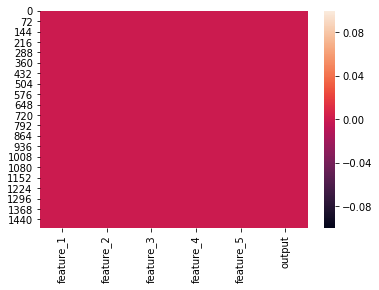

In [41]:
sns.heatmap(df.isnull())

## Splitting data into trainable feature and output feature

In [44]:
df_X = df[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']]
df_y = df['output']

In [46]:
df_X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1250,0.0,0.3048,71.3,0.002663
1,1600,0.0,0.3048,71.3,0.002663
2,2000,0.0,0.3048,71.3,0.002663
3,2500,0.0,0.3048,71.3,0.002663
4,3150,0.0,0.3048,71.3,0.002663


In [47]:
df_y.head()

0    125.951
1    127.591
2    127.461
3    125.571
4    125.201
Name: output, dtype: float64

## Doing feature scaling of data so that everyting should be between [-1, 1]

In [52]:
sc = StandardScaler()
transformed_X = sc.fit_transform(df_X)

## Spliting data into training and testing set

In [55]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, df_y, test_size = 0.2)

## Checking the shape of training and testing data

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1200, 5), (300, 5), (1200,), (300,))

## Applying Linear Regression to the data

In [57]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting on testing set

In [58]:
y_pred = linear_model.predict(X_test)

## Calculating the Log Mean Squared Error

In [66]:
mean_squared_log_error(y_test, y_pred)

0.0016435784745286303

## Calculating the Mean Squared Error

In [63]:
mean_squared_error(y_test, y_pred)

25.988853316950415

## Good luck !!!